        PC1       PC2  label
0  0.823414  2.466118      1
1 -1.734027 -0.961958      0
2 -1.240477 -1.156402      0
3 -1.837061 -0.866165      0
4 -2.863436  1.310516      0


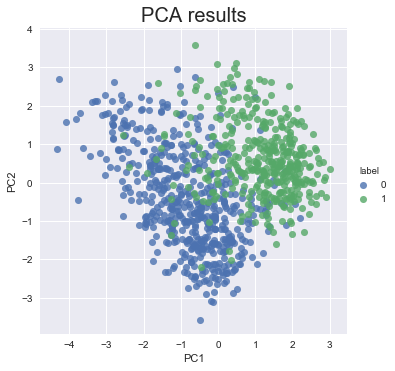

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

dataset = pd.read_csv('C:/Users/Casey/Documents/school/phys_243/HW/4/election_dataset.csv',
                           sep= ',', header=0)
# dataset.head()
X = dataset[['popul', 'TVnews', 'selfLR', 'ClinLR', 'DoleLR', 'PID', 'age', 'educ', 'income']] #Feature vector
#X.head(10)
Y = dataset[['vote']] # Label vector
#Y.head(10)
x_std = StandardScaler().fit_transform(X)
#print(np.shape(x_std))
#print(x_std)
features = x_std.T  # .T : transpose of a matrix
covariance_matrix = np.cov(features)
#print(np.shape(covariance_matrix))
#print(covariance_matrix)
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
#print('Eigenvectors \n%s' %eig_vecs)
#print('\nEigenvalues \n%s' %eig_vals)
projected_X = x_std.dot(eig_vecs.T[0]) # Dot product of two arrays
result = pd.DataFrame(projected_X, columns=['PC1'])
result['PC2'] = x_std.dot(eig_vecs.T[1]) 
result['label'] = Y
print(result.head())
sns.lmplot('PC1', 'PC2', data=result, fit_reg=False, scatter_kws={"s": 50}, hue="label") 
plt.title('PCA results', size=20)

        PC1       PC2  label
0 -0.823414  2.466118      1
1  1.734027 -0.961958      0
2  1.240477 -1.156402      0
3  1.837061 -0.866165      0
4  2.863436  1.310516      0


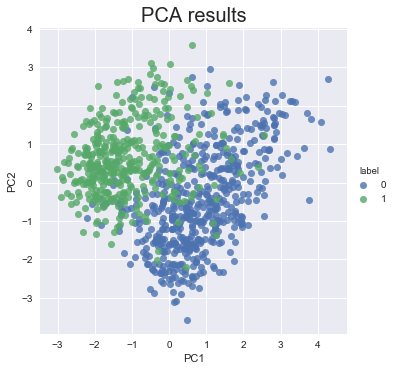

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

dataset = pd.read_csv('C:/Users/Casey/Documents/school/phys_243/HW/4/election_dataset.csv',
                           sep= ',', header=0)

#dataset.head()
X = dataset[['popul', 'TVnews', 'selfLR', 'ClinLR', 'DoleLR', 'PID', 'age', 'educ', 'income']] #Feature vector
#X.head(10)
Y = dataset[['vote']] # Label vector
#Y.head(10)

X = StandardScaler().fit_transform(X)
#print(np.shape(x_std))
#print(x_std)

pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(X)
principalDF = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
#principalDF.head()
principalDF['label'] = Y
print(principalDF.head())

sns.lmplot('PC1', 'PC2', data=principalDF, fit_reg=False, scatter_kws={"s": 50}, hue="label") 
plt.title('PCA results', size=20)


